# Evaluate the peak counting histograms


---

### Load modules

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import pickle

# module for peak counting included in the github repo
from generalized_peak_counting import PeakCount
import seaborn as sns

import random

### Load the data

Note, the demo notebook with shape noise generates this file.

In [3]:
peak_height, peak_steepness = pickle.load(open('results/demo_survey_n8.pkl','rb'))

### Select cosmological parameters for the plots

In [4]:
# Cosmological params when changin Omega_m, but similar sigma_8
PARAMS_O = [(0.227, 0.793),
            (0.26, 0.8),
            (0.36, 0.788),
            (0.45, 0.796)]

# Cosmological params when changin sigma_8 but similar Omega_m
PARAMS_S = [(0.267, 0.642),
            (0.26, 0.8),
            (0.275, 0.924),
            (0.273, 1.204)]

### Define a function for plotting

In [5]:
def plot_hists(params, peak_height, peak_steepness, cmap = sns.set_palette("coolwarm", 4),
               N1 = 50, N2 = 37, lw=5, fs=18):
    """Plot histograms."""
    X0 = (peak_height.bins[:-1] + peak_height.bins[1:])/2.
    X1 = (peak_steepness.bins[:-1] + peak_steepness.bins[1:])/2.

    figsize(14,6)
    f,a = plt.subplots(1,2,sharey='row')
    
    # peak height
    plt.sca(a[0])
    X, pc = X0,peak_height
    for k in params:
        # empty plot for labels
        line, = plot([],[],lw=lw,label=r'$\Omega_m,\sigma_8=$'+str(k))
        for j in range(N1):
            # plots
            line, = plot(X,np.mean(random.sample(pc.peak_list[k],N2),axis=0),
                         '-',lw=0.5,color=line.get_color())
    xlabel(r'peak height ($\kappa$)',fontsize=fs)
    ylabel(r'N peaks',fontsize=fs)
    yticks(fontsize=fs)
    xticks([0,0.05,0.1,0.15,0.2],fontsize=fs)
    xlim(min(X0),max(X0))
    plt.grid()

    # peak steepness
    plt.sca(a[1])
    X, pc = X1, peak_steepness
    for k in params:
        line, = plot([],[],lw=lw,label=r'$\Omega_m,\sigma_8=$'+str(k))
        for j in range(N1):
            line, = plot(X,np.mean(random.sample(pc.peak_list[k],N2),axis=0),
                         '-',lw=0.5,color=line.get_color())
    xlabel(r'peak steepness',fontsize=fs)
    xticks(fontsize=fs)
    yticks(fontsize=fs)
    legend(fontsize=fs-4,loc='upper right',fancybox=True)
    xlim(min(X1),max(X1))
    plt.grid()
    plt.tight_layout()
    ylim(0)

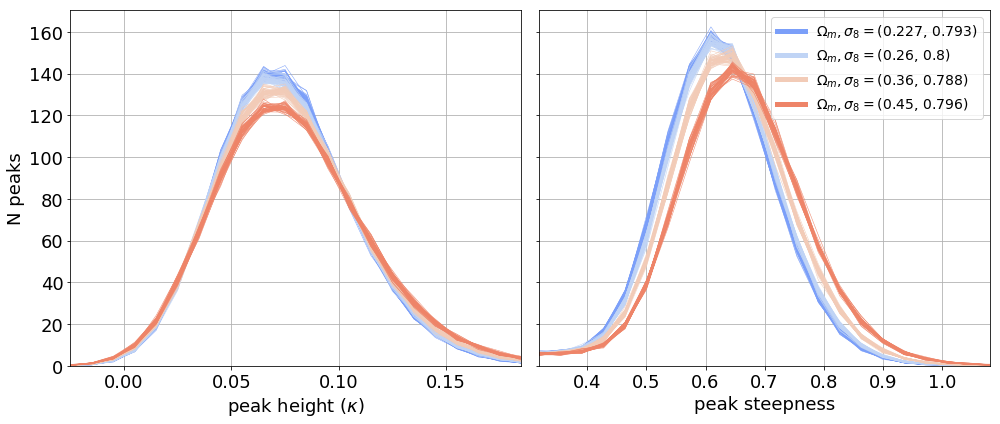

In [6]:
plot_hists(PARAMS_O, peak_height, peak_steepness)

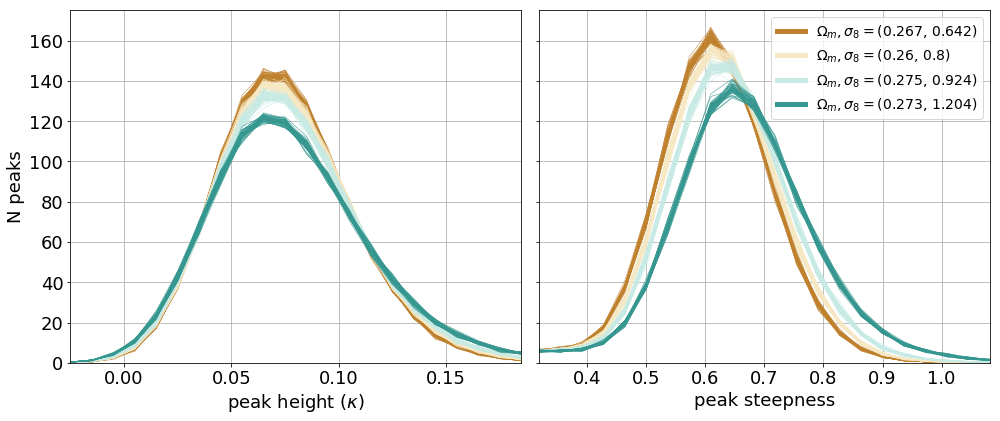

In [7]:
plot_hists(PARAMS_S, peak_height, peak_steepness, cmap=sns.set_palette('BrBG',4))

## The End